In [2]:
%load_ext autoreload
%autoreload 2

import sys
from pathlib import Path

from matplotlib import pyplot as plt
import numpy as np

root_dir = Path.cwd()
if not root_dir in sys.path: sys.path.insert(0,str(root_dir))

from detection_algorithm_test.surrogate_data import SurrogateData
from utils import prepare_behavior_from_file, prepare_activity
from HierarchicalBayesInference_analysis import HierarchicalBayesInference_analysis

In [3]:
track = {
    'nbin': 40,
    'length': 100,
}

place_field_parameter = {
	'n_fields': 2,
    
    'A0': [2,4],
	'A': [5,20],
	'sigma': [1,5],
    'theta': [0,track['nbin']],
    
    'reliability': [0.3,1],
}

In [4]:
pathSession = Path('../../../data/579ad/Session10')
# print([dir for dir in pathSession.iterdir()])
pathBehavior = pathSession / 'aligned_behavior.pkl'


behavior = prepare_behavior_from_file(pathBehavior,nbin=track['nbin'],f=15.)

In [5]:
# intensity_model = lambda x,parameter,fields : intensity_model_from_position(x=x,parameter=parameter,n_x=track['nbin'],fields=fields)

surrogate_data = SurrogateData(
    10,track,
    place_field_parameter,behavior,
    place_cell_probability=1.)
# surrogate_data.tuning_curve_parameter

In [6]:
surrogate_data.generate_activity_all(nP=8)

>>> all done. time passed: 0.1957 secs <<<


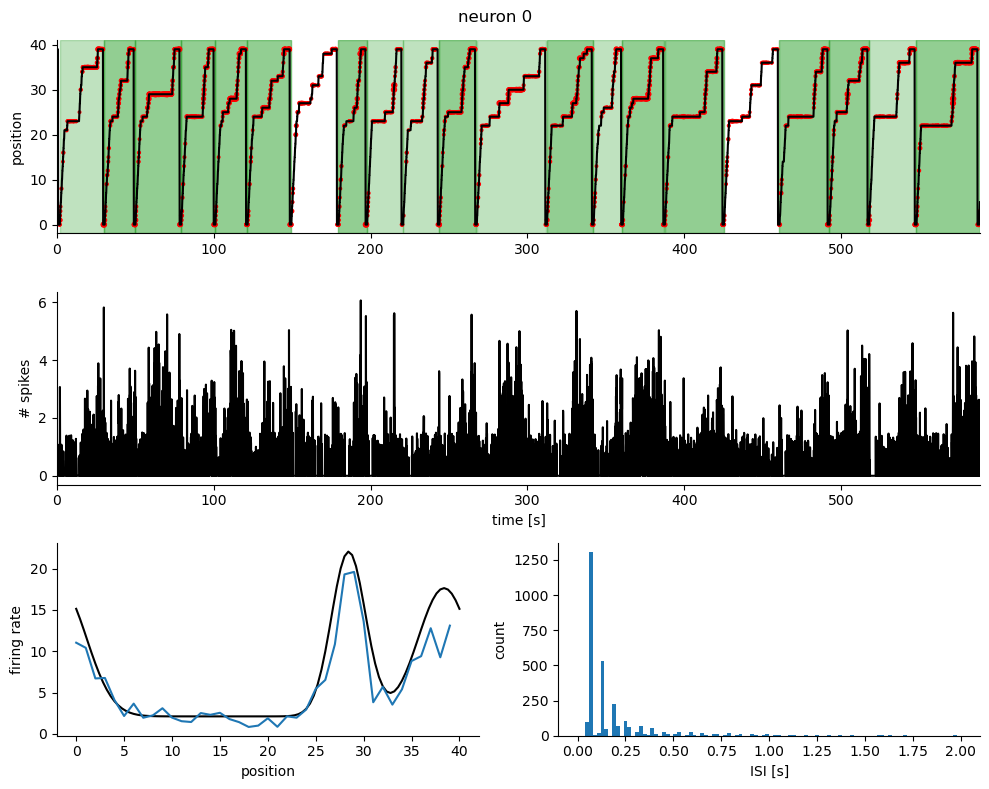

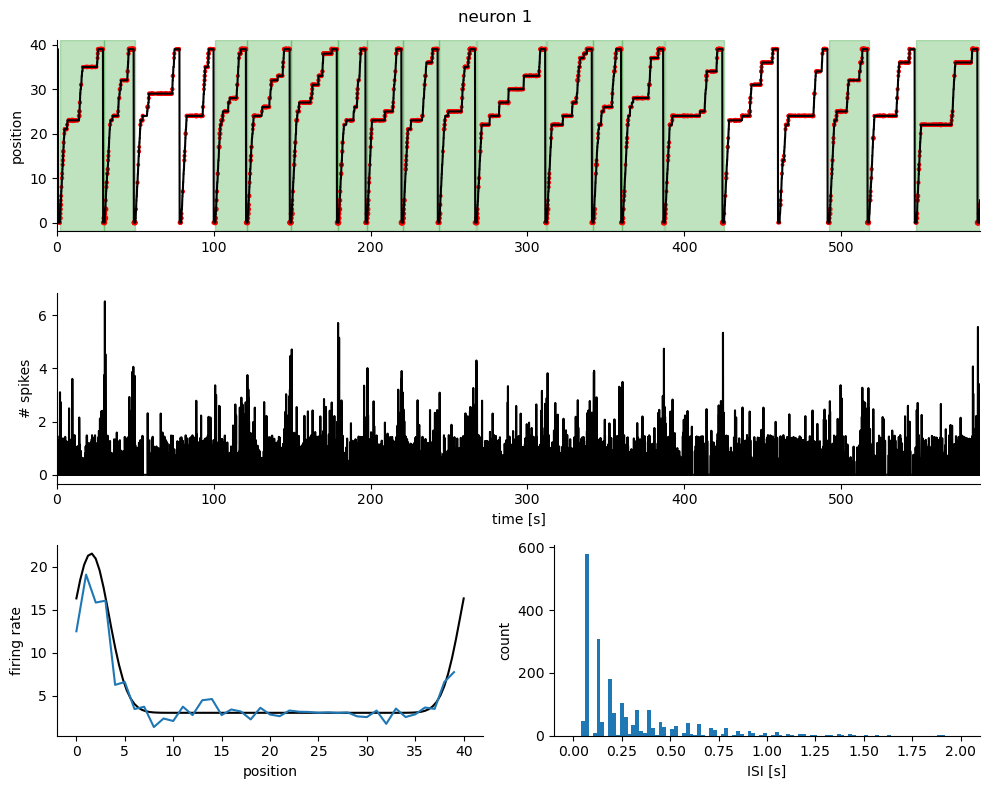

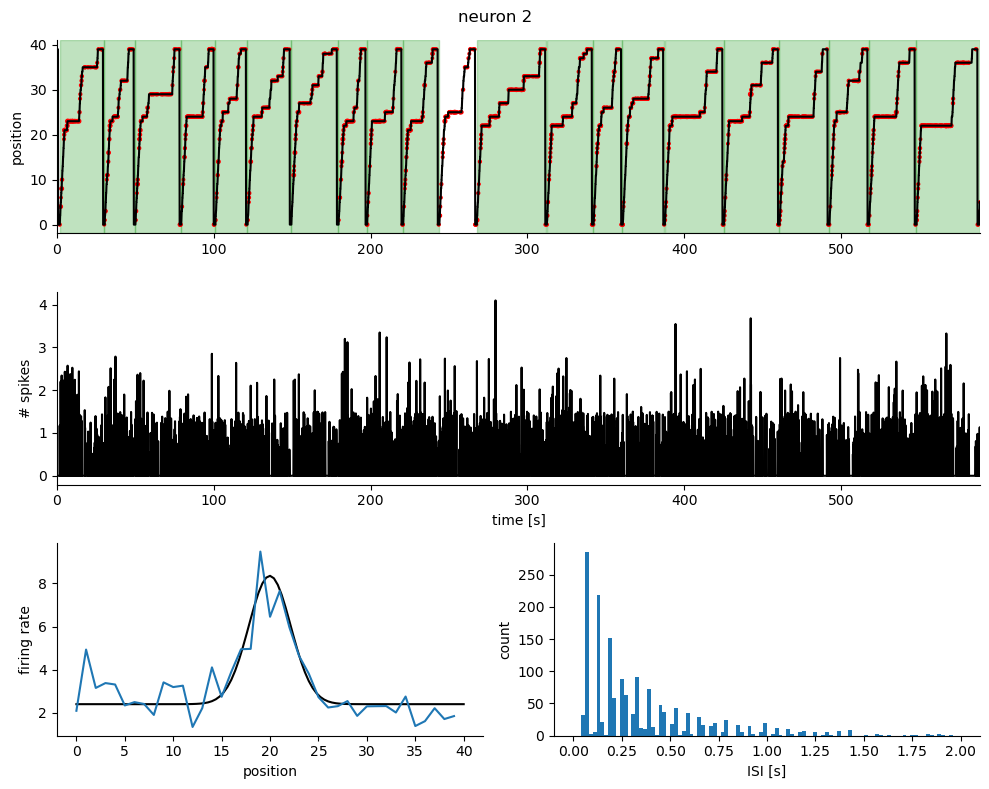

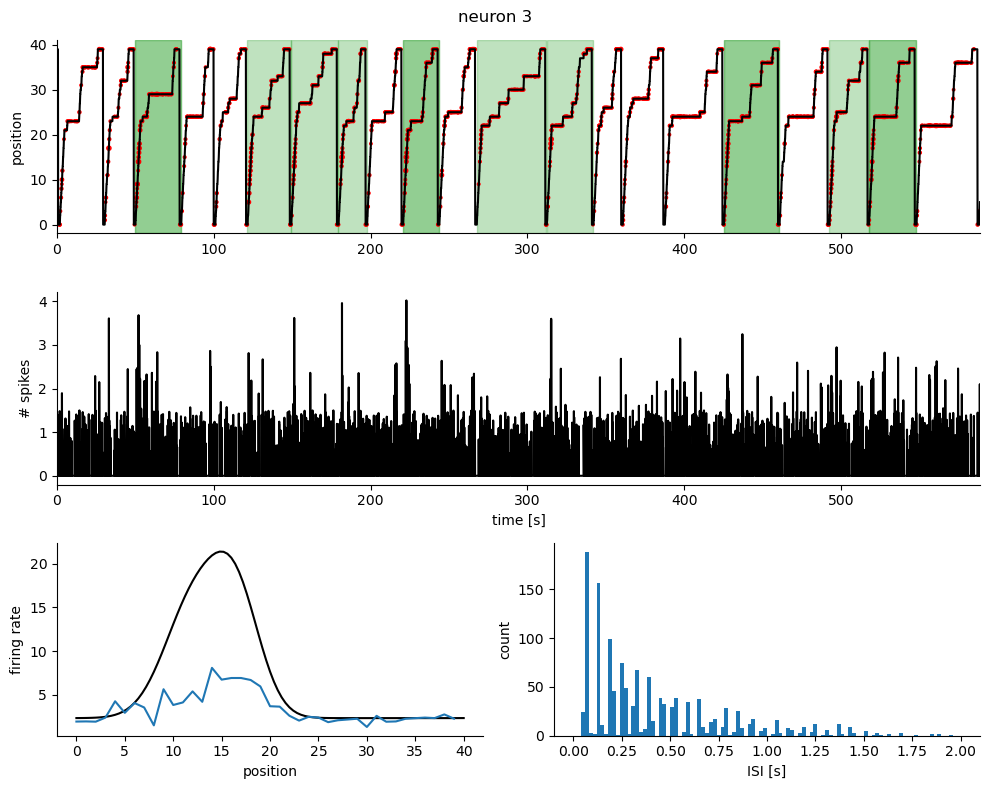

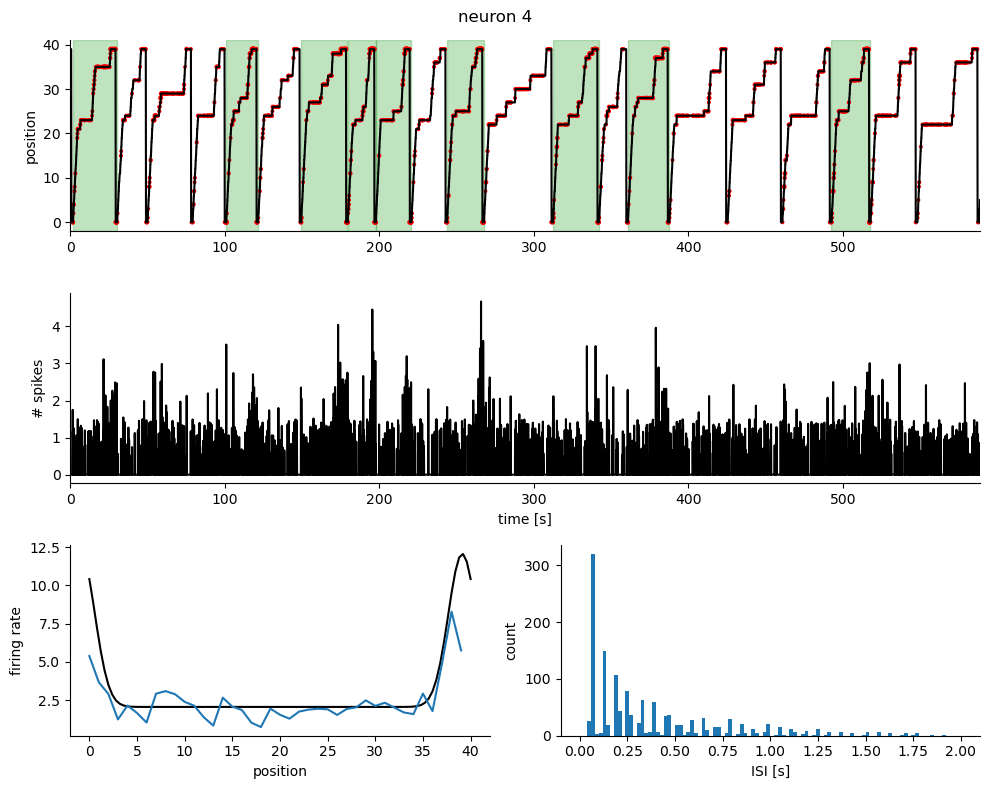

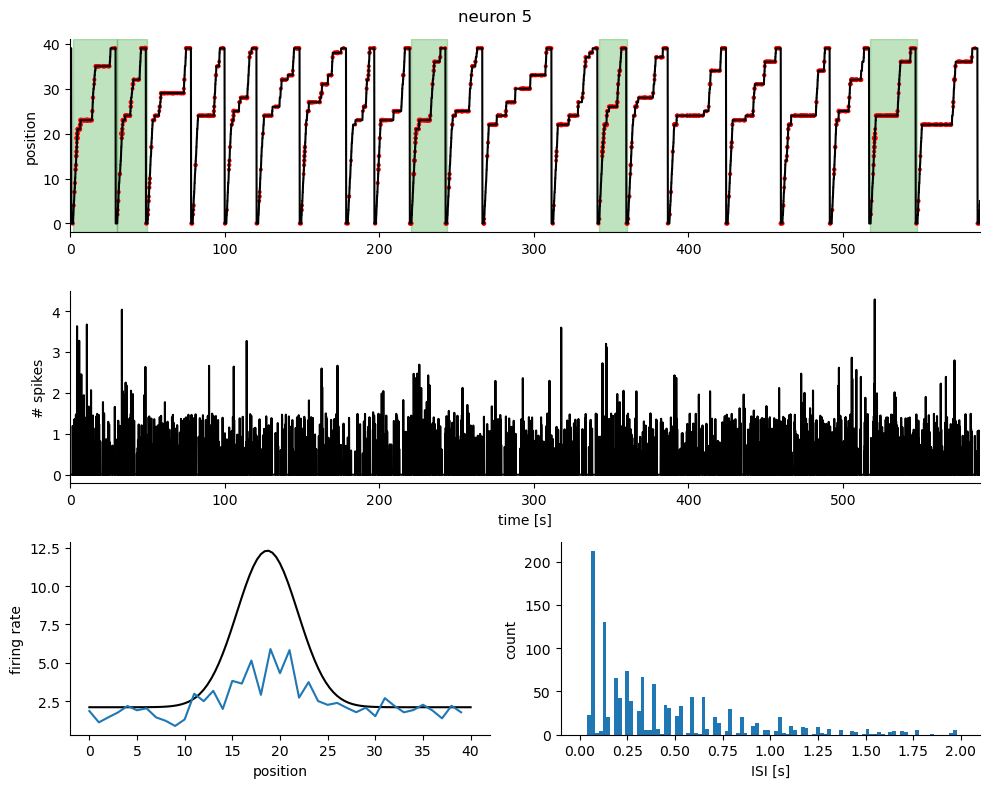

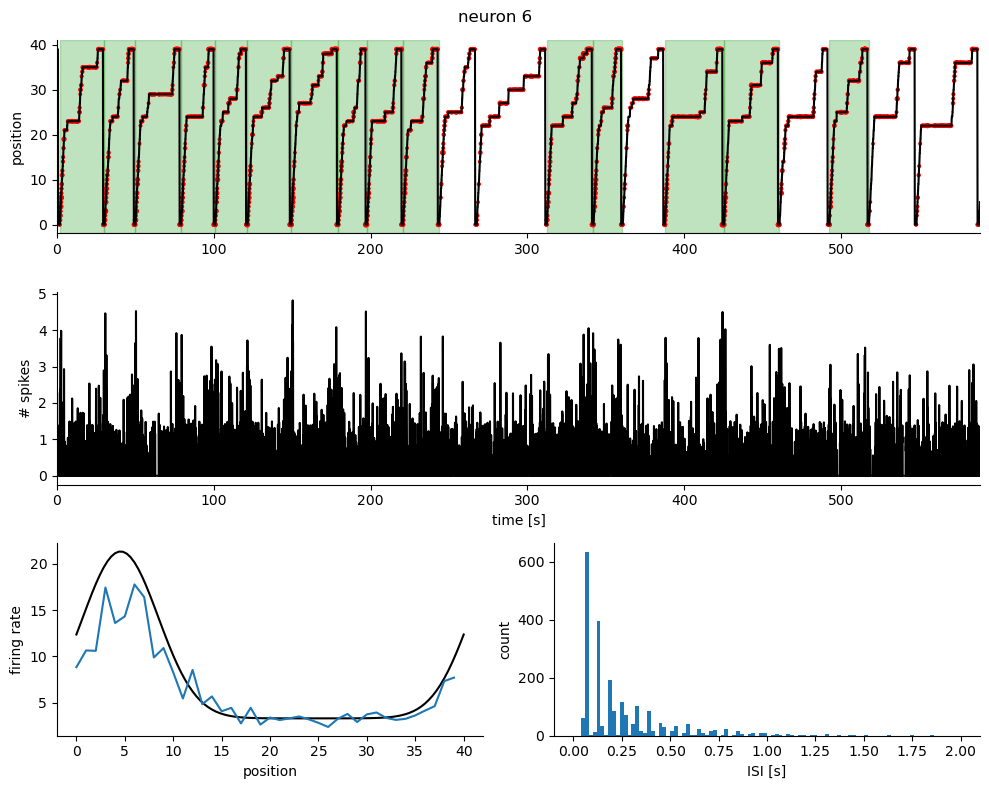

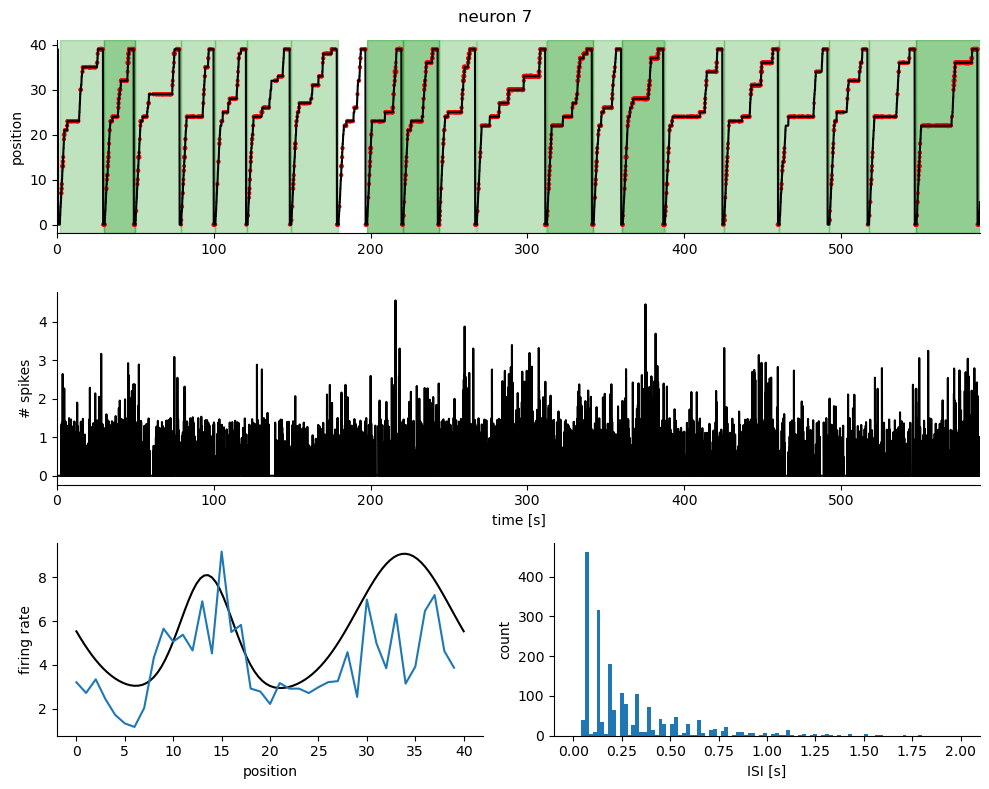

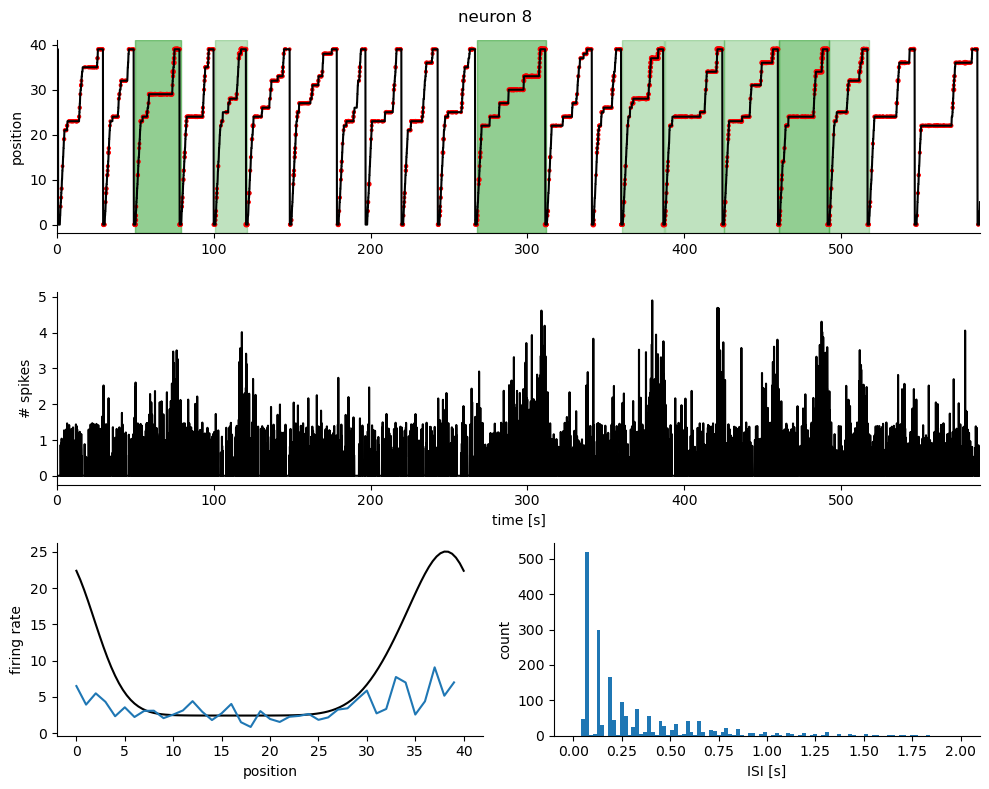

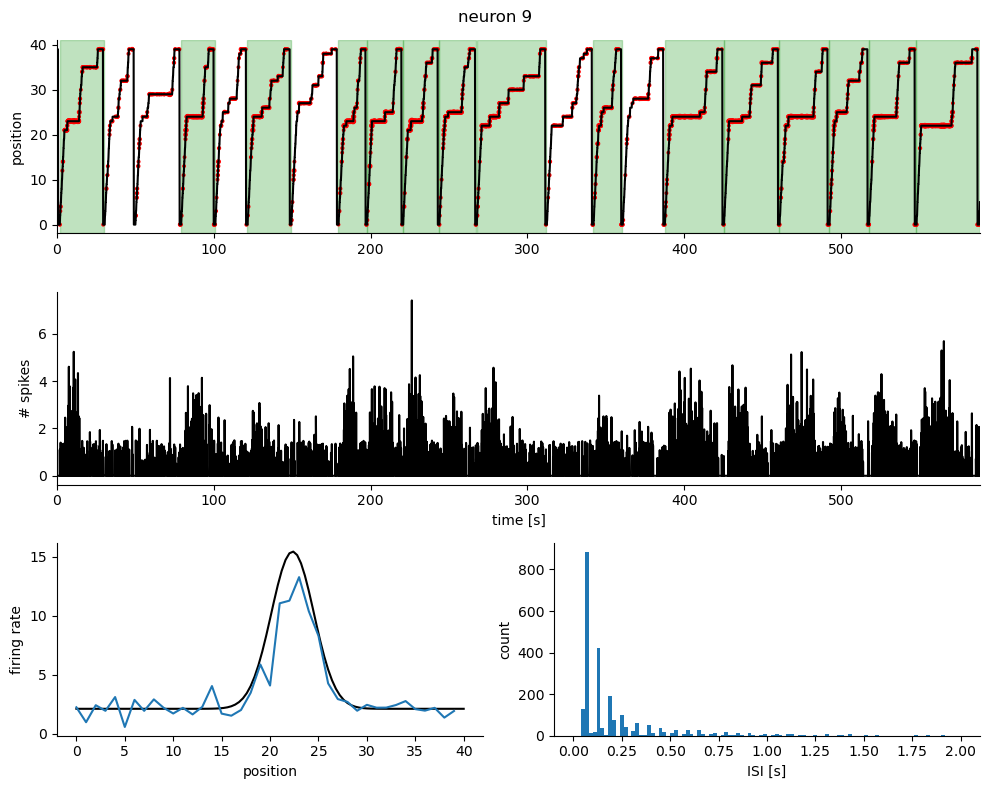

In [7]:
for n in range(10):
	surrogate_data.plot_activity(n)

ready for analysis!
f=2

match! 0.43885376709343404 5.004301364069667 4.565447596976231.0141] | it/evals=2370/99110 eff=2.3937% N=100 100 
[-1  0]
sensitivity=array([nan,  1.]), specficity=array([nan,  1.])
A0: 3.3047077835590604 vs 3.1280259102173735
PF2_A: 18.041974243877146 vs 18.075072053913196
PF2_sigma: 3.8907841251577744 vs 4.080145733493048


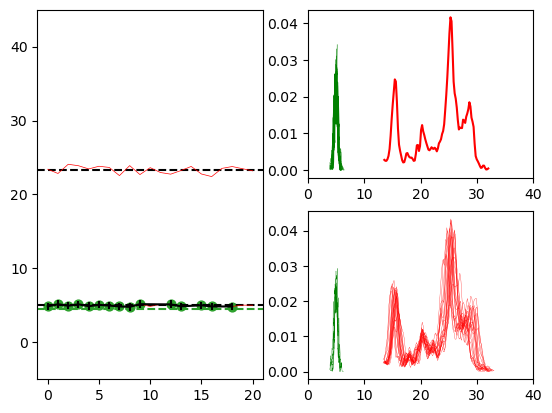

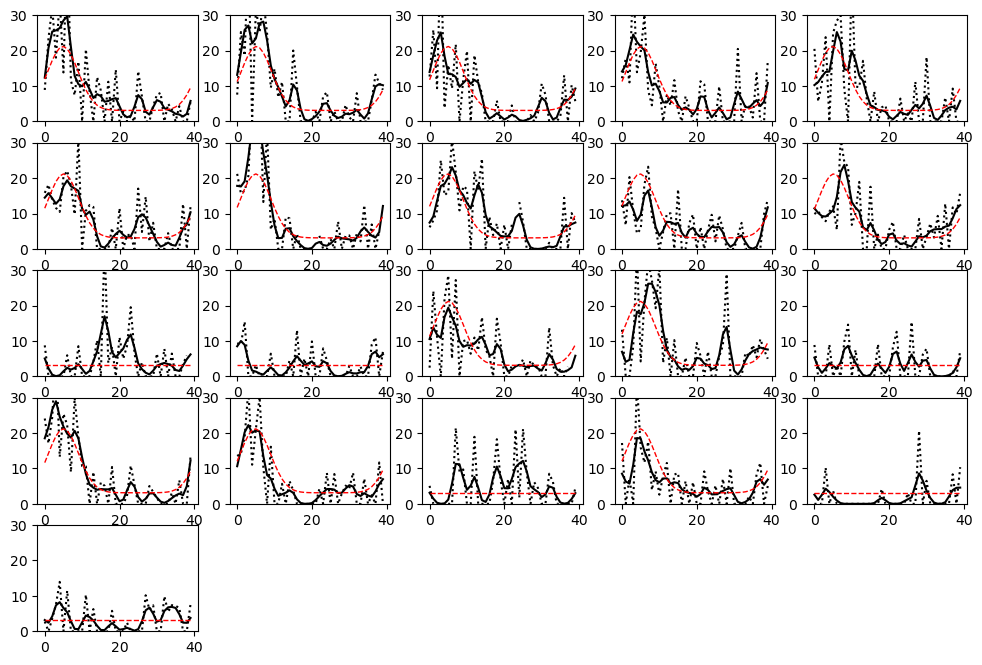


 logz=-1143.5194834898516


In [11]:
import logging

neuron = 6
nbin = 40

activity = prepare_activity(surrogate_data.activity[neuron,:],behavior['active'],behavior['trials'],nbin=nbin)
# activity = prepare_activity(activity_single,behavior['active'],behavior['trials'],nbin=nbin)


hierarchical=['theta']
wrap=[]

hbm = HierarchicalBayesInference_analysis(
	activity['spike_map'],
	behavior['trials']['dwelltime'],
	np.arange(nbin),
	logLevel=logging.ERROR,
)

logz = np.zeros(2)

for f in range(2,2+1):
	print(f'{f=}\n')
	hbm.set_priors(N_f=f,
		hierarchical_in=hierarchical,
		wrap=wrap)

	results = hbm.run_sampling(penalties=['overlap','reliability'],
			improvement_loops=1)
	hbm.display_results(results,
		groundtruth_fields=surrogate_data.tuning_curve_parameter[neuron],
		groundtruth_activation=surrogate_data.field_activation[neuron,...])
	# posterior = hbm.build_posterior(results)
	print(f"\n logz={results['logz']}")
	logz[f-1] = results['logz']

	# if f>0 and logz[f-1] > results['logz']:
	# 	break


[0 0]
sensitivity=array([0., 0.]), specficity=array([1., 1.])
A0: 3.7334277181847124 vs 3.6659478774486383
PF1_A: 6.874946517080991 vs 0.9439042360004738
PF1_sigma: 1.527612298667635 vs 2.064724665614014
PF2_A: 6.874946517080991 vs 1.4875614358161502
PF2_sigma: 1.527612298667635 vs 1.3104593857827547


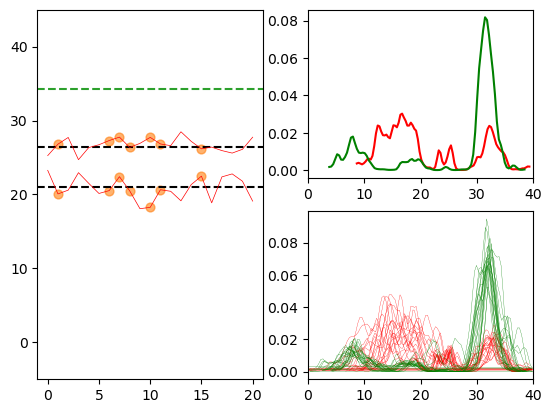

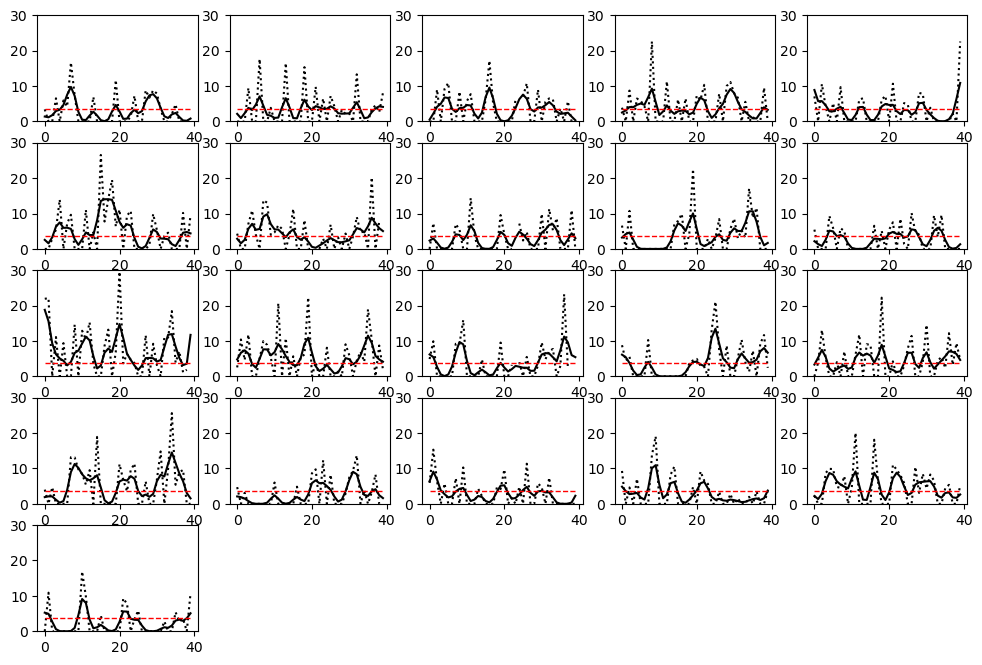

In [118]:
hbm.display_results(results,groundtruth_fields=surrogate_data.tuning_curve_parameter[neuron],groundtruth_activation=surrogate_data.field_activation[neuron,...])

[[[-1.06194064 -0.53097032 -0.9353679  ... -0.93212556 -0.53097032
   -2.70050768]
  [-2.65462145 -0.53097032 -0.53097032 ... -0.53097032 -5.30691901
   -1.9793121 ]
  [-0.79645548 -2.41993326 -0.53097032 ... -1.50593518 -1.56586217
   -1.02975905]
  ...
  [-1.06194064 -0.53097032 -0.53097032 ... -0.79645548 -0.26548516
   -2.01200757]
  [-3.91816813 -0.53097032 -1.6102464  ... -0.53097032 -2.50710686
   -3.84396829]
  [-1.06194064 -0.53097032 -0.79645548 ... -0.79645548 -4.18409814
   -4.91081968]]

 [[-3.17334511 -1.80791372 -1.36321113 ... -1.04029702 -1.10038265
   -1.55867266]
  [-1.54450213 -1.94587127 -2.00567874 ... -1.07542077 -2.64804622
   -1.65502489]
  [-2.3481403  -1.40610811 -1.94893795 ... -1.1955448  -1.15864729
   -2.27337281]
  ...
  [-3.36804791 -1.88089561 -1.99141543 ... -1.46765522 -0.59741394
   -1.71684967]
  [-1.69754702 -1.83366821 -1.55097923 ... -0.92674879 -1.58657741
   -1.83194235]
  [-3.58224209 -1.94908602 -3.00856883 ... -1.62237536 -2.53462034
   -1.

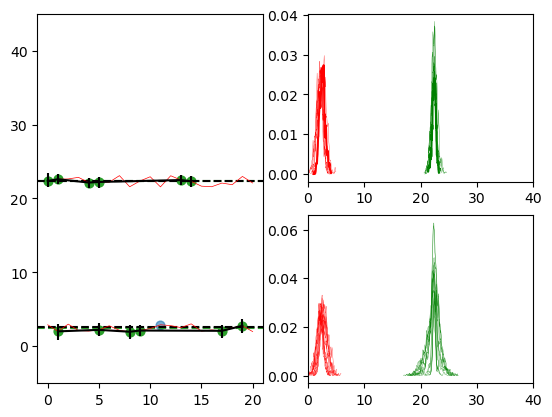

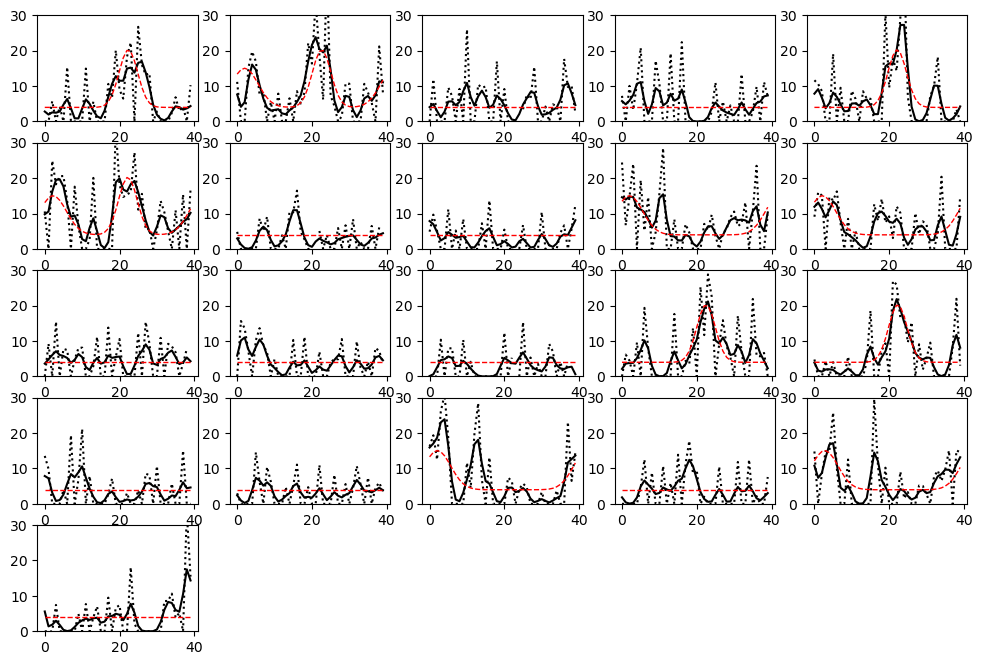

In [51]:
hbm.display_results(results,
	groundtruth_fields=surrogate_data.tuning_curve_parameter[neuron],
    groundtruth_activation=surrogate_data.field_activation[neuron,...])

In [61]:
surrogate_data.tuning_curve_parameter[neuron]

{'n_fields': 2,
 'A0': 3.973880571239728,
 'PF': [{'theta': 2.5347737865475395,
   'A': 8.864509514992562,
   'sigma': 3.576337929494902,
   'reliability': 0.37231587743385586},
  {'theta': 22.368892076461083,
   'A': 17.2059189335464,
   'sigma': 2.401364243946813,
   'reliability': 0.3923038264593901}]}

In [115]:
# my_logp = hbm.set_logp_func(penalties=['overlap','reliability'])
hbm.log.setLevel(logging.DEBUG)
my_logp = hbm.set_logp_func(penalties=['overlap','reliability'])
mean = np.array(results['posterior']['mean'])[np.newaxis,:]

my_logp(mean)

# uhm... penalty gives better logp???? fix this!!! 

DEBUG:nestLogger:time for transforming parameters: 23.84185791015625
DEBUG:nestLogger:time for tuning curve model: 189.30435180664062
DEBUG:nestLogger:time for poisson: 179.05235290527344
DEBUG:nestLogger:time for infield ranges: 77.48603820800781
DEBUG:nestLogger:time for AIC: 97.75161743164062
DEBUG:nestLogger:time for active model: 52.928924560546875
DEBUG:nestLogger:time for raw logp: 20.503997802734375
DEBUG:nestLogger:logp=array([-1107.42788864])
DEBUG:nestLogger:time for overlap penalty: 334.9781036376953
DEBUG:nestLogger:time for reliability penalty: 317.3351287841797
DEBUG:nestLogger:('penalty (zeroing):', array([0.]))
DEBUG:nestLogger:('penalty (centering):', array([0.]))
DEBUG:nestLogger:('penalty (overlap):', array([10.57423428]))
DEBUG:nestLogger:('penalty (reliability):', array([158.95385248]))
DEBUG:nestLogger:time for lower_bound_0 penalty: 1252.6512145996094
DEBUG:nestLogger:time for penalties: 19.311904907226562
DEBUG:nestLogger:logp=array([-1276.95597541])


array([-1276.95597541])

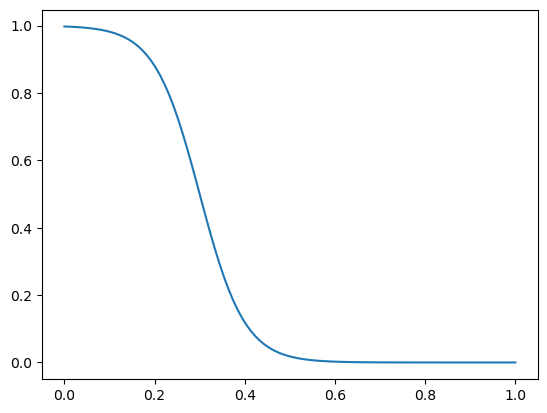

In [108]:
x = np.linspace(0,1,100)
sigm = 1 - 1 / ( 1 + np.exp(-20*(x-0.3) ))
plt.plot(x,sigm)

In [ ]:
print(f"{results_0['logz']=}, {results_1['logz']=}, {results_2['logz']=}")

adjust penalty for trial activation -> maybe penalty according to different AIC1-AIC2?

results_0['logz']=-3612.3673640246793, results_1['logz']=-3299.4147290425312, results_2['logz']=-2785.952549838066


In [ ]:
# eval_true = field_activation

reliability = (field_activation[0,:] & active_model[1,0,:]).sum() / field_activation[0,:].sum()
sensitivity = (field_activation[0,:] & active_model[1,0,:]).sum() / active_model[1,0,:].sum()

print(f'{}')

reliability=1.0, sensitivity=0.9166666666666666


In [262]:
behavior['binpos'].max()

39